In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Data Collection

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
main_df = pd.read_csv('/content/gdrive/MyDrive/Fraud.csv')
main_df.shape

(6362620, 11)

In [4]:
df = main_df.sample(frac=0.1, random_state=42)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [6]:
df.shape

(636262, 11)

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636262 entries, 3737323 to 759063
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 58.3+ MB


In [8]:
pd.options.display.float_format = '{:,.2f}'.format

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"636,262.00","636,262.00","636,262.00","636,262.00","636,262.00","636,262.00","636,262.00","636,262.00"
mean,243.53,"181,042.06","828,545.16","849,906.52","1,106,789.79","1,232,760.41",0.00,0.00
std,142.49,"613,686.71","2,877,270.65","2,913,448.98","3,396,119.42","3,685,490.05",0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,"13,362.92",0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,"74,949.35","14,111.81",0.00,"133,047.96","215,936.31",0.00,0.00
75%,335.00,"209,477.17","106,956.50","143,667.23","950,528.96","1,119,455.24",0.00,0.00
max,742.00,"69,337,316.27","37,919,816.48","37,950,093.25","327,998,074.22","328,431,698.23",1.00,1.00


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.duplicated().sum()

0

# EDA

In [12]:
fraud_counts = df['isFraud'].value_counts()
fraud_counts

isFraud
0    635445
1       817
Name: count, dtype: int64

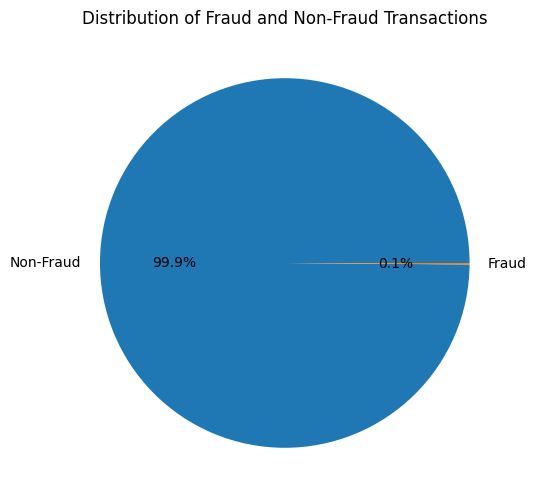

In [13]:
# Distribution of Fraud and Non-Fraud Transactions
fraud_counts = df['isFraud'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%')
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

In [14]:
type_counts = df['type'].value_counts()
type_counts

type
CASH_OUT    223689
PAYMENT     215342
CASH_IN     139694
TRANSFER     53444
DEBIT         4093
Name: count, dtype: int64

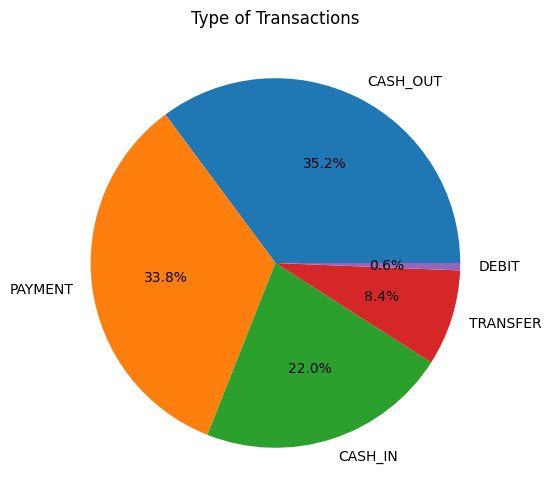

In [15]:
# Distribution of Transactions Type
plt.figure(figsize=(8, 6))
plt.pie(type_counts,labels=type_counts.index, autopct='%1.1f%%')
plt.title('Type of Transactions')
plt.show()

In [16]:
# Type of transaction having Fraud Transactions
df.groupby('type')['isFraud'].value_counts().unstack()

isFraud,0,1
type,,
CASH_IN,"139,694.00",NaN
CASH_OUT,"223,287.00",402.00
DEBIT,"4,093.00",NaN
PAYMENT,"215,342.00",NaN
TRANSFER,"53,029.00",415.00


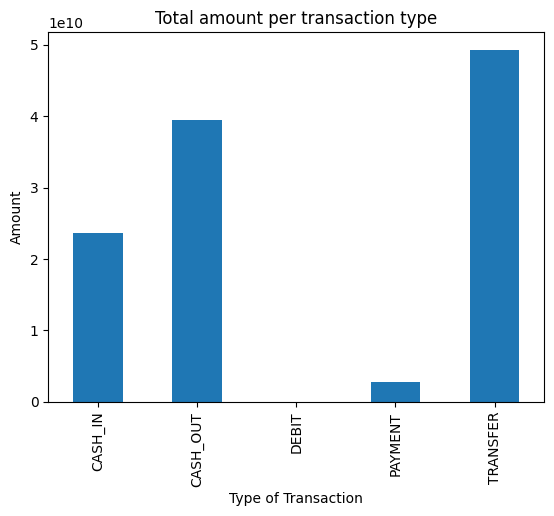

In [17]:
# Total amount per transaction type
var = df.groupby('type').amount.sum()
var.plot(kind='bar', title='Total amount per transaction type')
plt.xlabel('Type of Transaction')
plt.ylabel('Amount')
plt.show()

<Axes: >

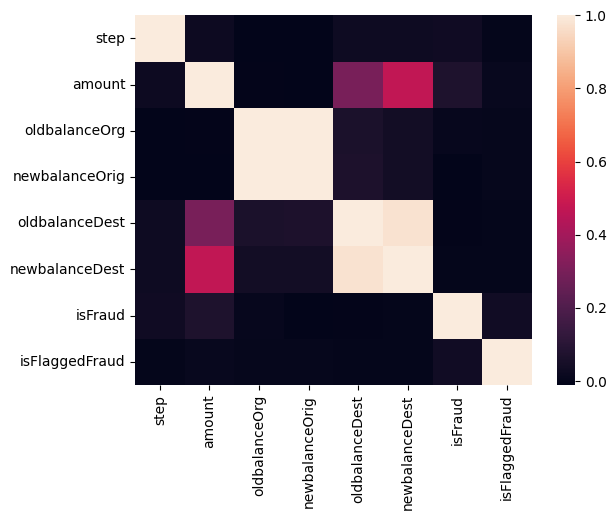

In [18]:
# Corellation
sns.heatmap(df.corr(numeric_only=True))

# Data Preprocessing

In [19]:
# Dropping highly correlated features
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [20]:
# Feature Engineering
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

In [21]:
# one hot encoding for type
df = pd.get_dummies(df, columns=['type'],dtype=int)

In [22]:
# Label Encoding for nameOrig and nameDest
from sklearn.preprocessing import LabelEncoder

df['nameOrig'] = LabelEncoder().fit_transform(df['nameOrig'])
df['nameDest'] = LabelEncoder().fit_transform(df['nameDest'])

In [23]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,278,"330,218.42",515158,"20,866.00","351,084.42",221549,"452,419.57","122,201.15",0,"660,436.84","660,436.84",1,0,0,0,0
264914,15,"11,647.08",87134,"30,370.00","18,722.92",370005,0.00,0.00,0,0.00,"11,647.08",0,0,0,1,0
85647,10,"152,264.21",246139,"106,589.00","258,853.21",76027,"201,303.01","49,038.80",0,"304,528.42","304,528.42",1,0,0,0,0
5899326,403,"1,551,760.63",416801,0.00,0.00,70612,"3,198,359.45","4,750,120.08",0,"1,551,760.63",0.00,0,0,0,0,1
2544263,206,"78,172.30",574944,"2,921,331.58","2,999,503.88",11530,"415,821.90","337,649.60",0,"156,344.60","156,344.60",1,0,0,0,0


In [32]:
# Multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

predictors = df[['step','amount',	'nameOrig',	'oldbalanceOrg'	,'newbalanceOrig',	'nameDest',	'oldbalanceDest',	'newbalanceDest',
                 'isFraud',	'errorBalanceOrig',	'errorBalanceDest',	'type_CASH_IN',	'type_CASH_OUT','type_DEBIT',	'type_PAYMENT',	'type_TRANSFER']]
c = sm.add_constant(predictors)

In [33]:
vif_data = pd.DataFrame()
vif_data["feature"] = c.columns
vif_data["VIF"] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
print(vif_data)

             feature  VIF
0              const 0.00
1               step 1.00
2             amount  inf
3           nameOrig 1.00
4      oldbalanceOrg  inf
5     newbalanceOrig  inf
6           nameDest 3.58
7     oldbalanceDest  inf
8     newbalanceDest  inf
9            isFraud 1.21
10  errorBalanceOrig  inf
11  errorBalanceDest  inf
12      type_CASH_IN  inf
13     type_CASH_OUT  inf
14        type_DEBIT  inf
15      type_PAYMENT  inf
16     type_TRANSFER  inf


In [ ]:
X = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [26]:
# Spliting data into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [27]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [28]:
# Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling and Evaluation

In [29]:
# Modeling, Prediction, Accuracy Score and CV Score
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy: ',accuracy_score(train_pred,y_train))
print('Test Accuracy: ',accuracy_score(y_pred,y_test))

from sklearn.model_selection import cross_val_score
score = cross_val_score(rf_model,X,y,cv=5)
print('CV score: ',score.mean())

Train Accuracy:  1.0
Test Accuracy:  0.9999921416390969
CV score:  0.9999968566432879


In [30]:
# Feature Importance
rf_model.feature_importances_
pd.DataFrame(index=X.columns,data=rf_model.feature_importances_,columns=['Feature Importances'])

,Feature Importances
step,0.02
amount,0.07
nameOrig,0.00
oldbalanceOrg,0.14
newbalanceOrig,0.16
nameDest,0.05
oldbalanceDest,0.02
newbalanceDest,0.03
errorBalanceOrig,0.36
errorBalanceDest,0.04


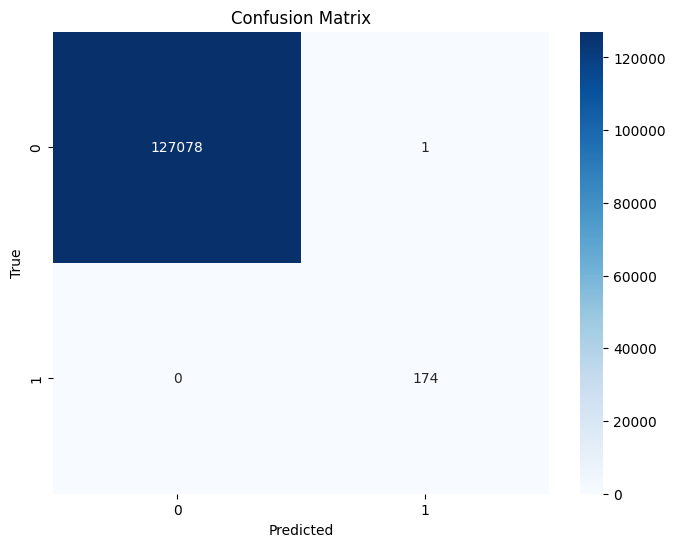

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127078
           1       1.00      0.99      1.00       175

    accuracy                           1.00    127253
   macro avg       1.00      1.00      1.00    127253
weighted avg       1.00      1.00      1.00    127253



In [33]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 1.00


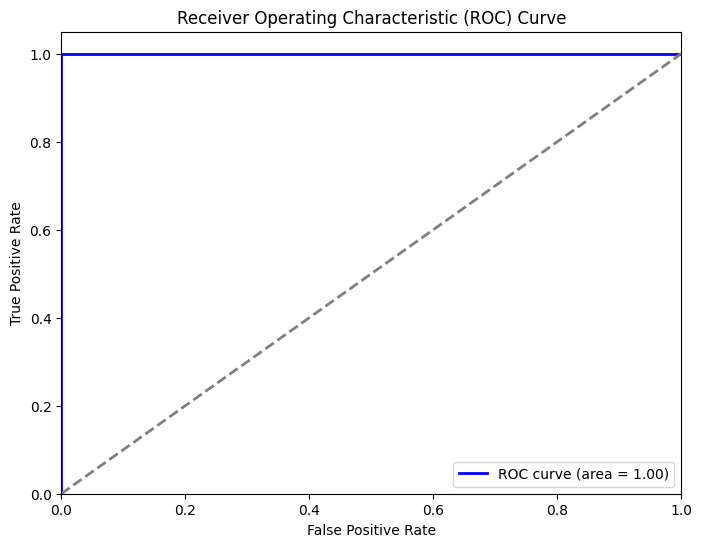

In [34]:
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()